# <b> <center>Sentiment Analysis: Analyzing Amazon Customer Review</b> </center>
    
The reviews of a product can contain useful information. It can be used as a feedback to improve the product the way a customer wants. But extracting information from hundreds and thousands of reviews can be too much work for a human. If we can do it in machine, it can be done more efficiently. A first step towards that is through <b>Sentiment Analysis</b>. We will try to understand if a review is a good or a bad review.

# Import library and functions

We are going to import necessary libraries and prebuilt functions for the project.

In [1]:
import project1 as p1
import utils
import numpy as np

# Load the Data

In [2]:
train_data = utils.load_data('reviews_train.tsv')
val_data = utils.load_data('reviews_val.tsv')
test_data = utils.load_data('reviews_test.tsv')


stopword_file = open('stopwords.txt', 'r')
stopwords = [word[:-1] for word in stopword_file]

train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))

# Create feature vectors
We will use a prebuilt function to make a feature vector out of the reviews based on a word dictionary. The dictionary looks for the words that have high importance and we are going to look for in the review. We will also avoid certain words that we defined as stopwords. the feature vector will reflect how often a word appears in a review.

In [3]:
stop_dict = p1.bag_of_words(stopwords, {})
dictionary = p1.bag_of_words(train_texts, stop_dict)
#dictionary = p1.improve_word_dict(draft_dictionary, stop_dict)


train_bow_features = p1.extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features = p1.extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features = p1.extract_bow_feature_vectors(test_texts, dictionary)

# Testing our models

We have programmed necesssary functions that will be used in this project. Here, we will test functions for different algorithms against a 2D toy model to see if they are effective.

theta for Perceptron is 3.9173999999999918, 4.164000000000001
theta_0 for Perceptron is -8.0


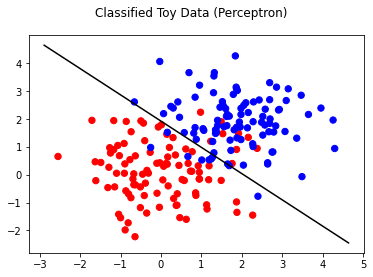

theta for Average Perceptron is 3.47826049999999, 3.611060999999974
theta_0 for Average Perceptron is -6.373


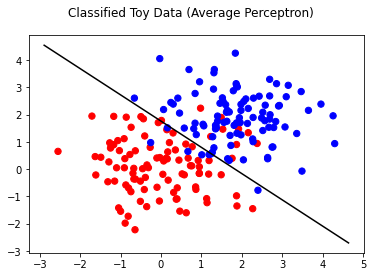

theta for Pegasos is 0.7346463119064065, 0.6300224592973831
theta_0 for Pegasos is -1.2195071848898564


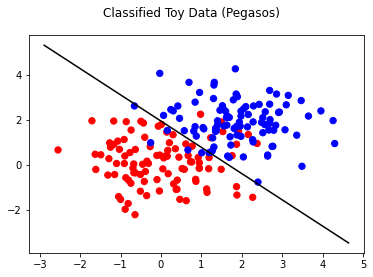

In [4]:
toy_features, toy_labels = toy_data = utils.load_toy_data('toy_data.tsv')
#
T = 10
L = 0.2
#
thetas_perceptron = p1.perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = p1.average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = p1.pegasos(toy_features, toy_labels, T, L)
#
def plot_toy_results(algo_name, thetas):
    print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
    print('theta_0 for', algo_name, 'is', str(thetas[1]))
    utils.plot_toy_data(algo_name, toy_features, toy_labels, thetas)

plot_toy_results('Perceptron', thetas_perceptron)
plot_toy_results('Average Perceptron', thetas_avg_perceptron)
plot_toy_results('Pegasos', thetas_pegasos)

It seems like they all were able to find the separating line quite well.

# Test against our training data

Since it seems like they are working well on 2D data, they should be good for real training data.

In [4]:
T = 10
L = 0.01
#
pct_train_accuracy, pct_val_accuracy = p1.classifier_accuracy(p1.perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:35} \t\t\t{:.4f}".format("Training accuracy for perceptron:", pct_train_accuracy))
print("{:35} \t\t\t{:.4f}".format("Validation accuracy for perceptron:", pct_val_accuracy))

avg_pct_train_accuracy, avg_pct_val_accuracy = p1.classifier_accuracy(p1.average_perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:43} \t\t{:.4f}".format("Training accuracy for average perceptron:", avg_pct_train_accuracy))
print("{:43} \t\t{:.4f}".format("Validation accuracy for average perceptron:", avg_pct_val_accuracy))

avg_peg_train_accuracy, avg_peg_val_accuracy = p1.classifier_accuracy(p1.pegasos, train_bow_features,val_bow_features,train_labels,val_labels,T=T,L=L)
print("{:50} \t{:.4f}".format("Training accuracy for Pegasos:", avg_peg_train_accuracy))
print("{:50} \t{:.4f}".format("Validation accuracy for Pegasos:", avg_peg_val_accuracy))

Training accuracy for perceptron:   			0.7953
Validation accuracy for perceptron: 			0.6900
Training accuracy for average perceptron:   		0.9030
Validation accuracy for average perceptron: 		0.7520
Training accuracy for Pegasos:                     	0.8592
Validation accuracy for Pegasos:                   	0.7480


# Tuning the parameter
The choice of parameter such as number of times the algorithm will run and the increment at which the correction will be applied affects the accuracy as much as the algorithms themselves.

Let's start with the <b>Perception Algorithm</b>

In [5]:
data = (train_bow_features, train_labels, val_bow_features, val_labels)
#
# # values of T and lambda to try
Ts = [1, 5, 10, 15, 25, 50]
Ls = [0.001, 0.01, 0.1, 1, 10]
#
pct_tune_results = utils.tune_perceptron(Ts, *data)
print('perceptron valid:', list(zip(Ts, pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(pct_tune_results[1]), Ts[np.argmax(pct_tune_results[1])]))

perceptron valid: [(1, 0.64), (5, 0.684), (10, 0.69), (15, 0.726), (25, 0.728), (50, 0.754)]
best = 0.7540, T=50.0000


We can do the same with Average Perception and Pegasos algorithm too.

avg perceptron valid: [(1, 0.732), (5, 0.746), (10, 0.752), (15, 0.748), (25, 0.744), (50, 0.752)]
best = 0.7520, T=10.0000
Pegasos valid: tune T [(1, 0.686), (5, 0.726), (10, 0.748), (15, 0.746), (25, 0.768), (50, 0.752)]
best = 0.7680, T=25.0000
Pegasos valid: tune L [(0.001, 0.768), (0.01, 0.768), (0.1, 0.718), (1, 0.52), (10, 0.51)]
best = 0.7680, L=0.0010


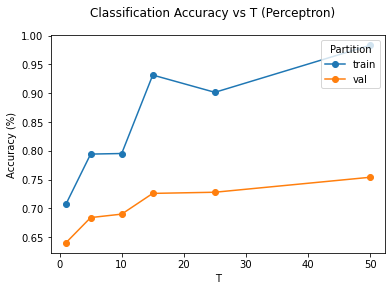

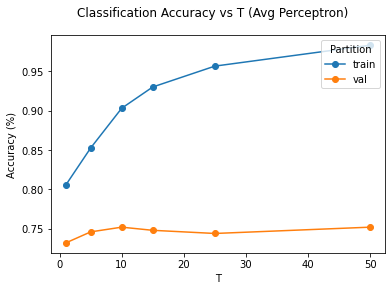

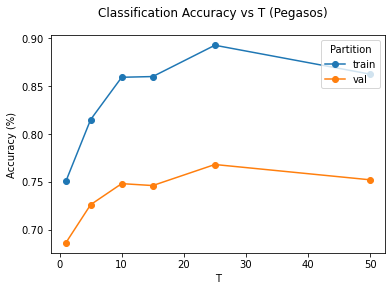

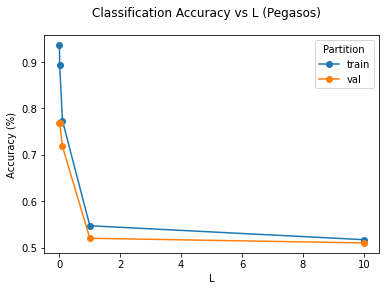

In [6]:
avg_pct_tune_results = utils.tune_avg_perceptron(Ts, *data)
print('avg perceptron valid:', list(zip(Ts, avg_pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(avg_pct_tune_results[1]), Ts[np.argmax(avg_pct_tune_results[1])]))
#
# # fix values for L and T while tuning Pegasos T and L, respective
fix_L = 0.01
peg_tune_results_T = utils.tune_pegasos_T(fix_L, Ts, *data)
print('Pegasos valid: tune T', list(zip(Ts, peg_tune_results_T[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(peg_tune_results_T[1]), Ts[np.argmax(peg_tune_results_T[1])]))
#
fix_T = Ts[np.argmax(peg_tune_results_T[1])]
peg_tune_results_L = utils.tune_pegasos_L(fix_T, Ls, *data)
print('Pegasos valid: tune L', list(zip(Ls, peg_tune_results_L[1])))
print('best = {:.4f}, L={:.4f}'.format(np.max(peg_tune_results_L[1]), Ls[np.argmax(peg_tune_results_L[1])]))
#
utils.plot_tune_results('Perceptron', 'T', Ts, *pct_tune_results)
utils.plot_tune_results('Avg Perceptron', 'T', Ts, *avg_pct_tune_results)
utils.plot_tune_results('Pegasos', 'T', Ts, *peg_tune_results_T)
utils.plot_tune_results('Pegasos', 'L', Ls, *peg_tune_results_L)

# Implement the best method
We found that among all the methods (perceptron, average perceptron or Pegasos) along with the optimal hyperparameters, Pegasos performs best at T= 25 and L = 0.001 according to validation accuracies. We will use this method on our test dataset to find the test accuracy.

In [7]:
T=25
L= 0.0010
train_accuracy, test_accuracy = p1.classifier_accuracy(p1.pegasos, train_bow_features, test_bow_features, train_labels,  test_labels, T=T, L=L )

print('Training Accuracy : ', train_accuracy," and Testing accuracy : ", test_accuracy)

Training Accuracy :  0.936  and Testing accuracy :  0.782


# What words make good review and bad review
Now, we will try to make a little sense of the result we got.

We will use the best parameters on the Pegasos Algorithm to get the weights for the model and find the words that matters most in determining the sentiment of the review.

In [8]:
T=25
L= 0.0010

#best_theta = None # Your code here
best_theta, t_0 = p1.pegasos(train_bow_features, train_labels, T=T, L=L)
wordlist   = [word for (idx, word) in sorted(zip(dictionary.values(), dictionary.keys()))]
sorted_word_features = utils.most_explanatory_word(best_theta, wordlist)
print("Most Explanatory Word Features")
print(sorted_word_features[:10])

Most Explanatory Word Features
['perfect', 'delicious', 'pleased', 'loves', 'glad', 'great', 'bp', 'thank', 'excellent', 'highly']
